In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.utils import shuffle

from sklearn.ensemble import AdaBoostClassifier

In [2]:
path = os.path.join(os.getcwd(),"Gillam", "SLI")
print(os.listdir(path))
cat = os.listdir(path)
for i in cat:
    deeper = os.path.join(path,i)
    nextdir = os.listdir(deeper)

['10f', '10m', '11m', '5f', '5m', '6f', '6m', '7f', '7m', '8f', '8m', '9f', '9m']


In [3]:
def cleanString(string):
    newS =""
    brack = False
    for c in string:
        if c == "[":
            newS+=" "
            brack=True
            continue
        else:
            if brack:
                if c=="]":
                    brack=False
                    newS+=" "
                continue
            else:
                if c in "<>&~-+/:()@":
                    continue
                else:
                    newS+=c
    return newS

def createData(path,cat):
    dataset = pd.DataFrame()
    typ = cat
    cat = os.listdir(path)
    for i in cat:
        deeper = os.path.join(path,i)
        nextdir = os.listdir(deeper)
        i = i.replace("f","")
        i = i.replace("m","")
        i = int(i)
        for j in nextdir:
            with open(os.path.join(deeper,j),encoding="utf8") as f:
                numUtter,inter, vocSize, maxSenSize,pause, allWords = getFeatures(f)
                meanSenSize = allWords/numUtter
                frame=[typ,i,numUtter,inter,vocSize,maxSenSize,pause,meanSenSize]
                dataset=pd.concat([dataset,pd.Series(frame).to_frame().T],ignore_index=True)
    return dataset.rename(columns={0:"Type", 1 : "Age", 2 :"Number of Utterances", 3 : "Interventions", 4 : "Vocabulary Size", 5 :"Max Sentence Size", 6 :"Pauses", 7:"Mean Sentence Size" })


def getFeatures(f):
    numUtter = 0
    inter = 0
    vocSize = set([])
    maxSenSize = 0
    pause = 0
    allWords = 0

    for l in f:
        if l is None:
            break

        if "*CHI" in l:
            l=l.replace("\n"," ")
            l=l.replace("\t"," ")
            l=l.replace("*CHI","")
            l=l.replace("..","")
            l=l.replace("<","")
            l=l.replace(">","")
            l=l.replace("  "," ")
            l=l.replace(":","")


            l = l.split(" ")
            l = l[1:-2]

            numUtter+=1

            if "[/]" in l:
                pause += 1
                l.remove("[/]")

            if "[/?]" in l:
                pause += 1
                l.remove("[/?]")

            if maxSenSize < len(l):
                maxSenSize=len(l)

            allWords+= len(l)

            vocSize.update(set(l))


        elif "*INV" in l:
            inter+=1
            continue

    return numUtter,inter, len(vocSize), maxSenSize, pause, allWords


def plot_feature_importance(model,col):
    n_features = X_train.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center',color=col)
    plt.yticks(np.arange(n_features), X_train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

In [4]:
print(cleanString("and and  and he need [] to tie his shoe . "))

and and  and he need    to tie his shoe . 


In [5]:
#  var
numUtter = 0
intervention = 0
vocabSize = 0
SenLenMax = 0

path = os.path.join(os.getcwd(),"Gillam", "SLI")
dataS=createData(path,"SLI")
dataS=shuffle(dataS)

split = len(dataS)*0.8
print(split)

# get the locations
dataTrS = dataS.iloc[:int(split), :]
dataTeS = dataS.iloc[int(split):, :]


path = os.path.join(os.getcwd(),"Gillam", "TD")
dataT=createData(path,"TD")
dataT=shuffle(dataT)

dataT = dataT.iloc[:len(dataS), :]
split = len(dataT)*0.8
print(split)

# get the locations
dataTrT = dataT.iloc[:int(split), :]
dataTeT = dataT.iloc[int(split):, :]

dataTrain = pd.concat([dataTrS,dataTrT],ignore_index=True)
dataTest = pd.concat([dataTeS,dataTeT],ignore_index=True)



136.8
136.8


In [6]:
dataTrain=shuffle(dataTrain)
dataTest=shuffle(dataTest)

print(dataTrain)
print(dataTest)

X_train = dataTrain.iloc[:, 1:]
y_train = dataTrain.iloc[:,0]

X_test = dataTest.iloc[:,1:]
y_test = dataTest.iloc[:,0]


print(X_train)
print(y_train)

    Type Age Number of Utterances Interventions Vocabulary Size  \
61   SLI   7                   44             0             143   
53   SLI   5                   24            20              82   
126  SLI   9                   39            16             159   
67   SLI   7                   58             1             149   
73   SLI  10                   30             3             112   
..   ...  ..                  ...           ...             ...   
195   TD   6                   29             0              99   
14   SLI   9                   44             3             151   
118  SLI   6                   28             4              93   
237   TD   6                   21             1             105   
222   TD   6                   27            10              77   

    Max Sentence Size Pauses Mean Sentence Size  
61                 27     35           9.227273  
53                 19      5              6.125  
126                21      7           8.5641

# Models

In [7]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

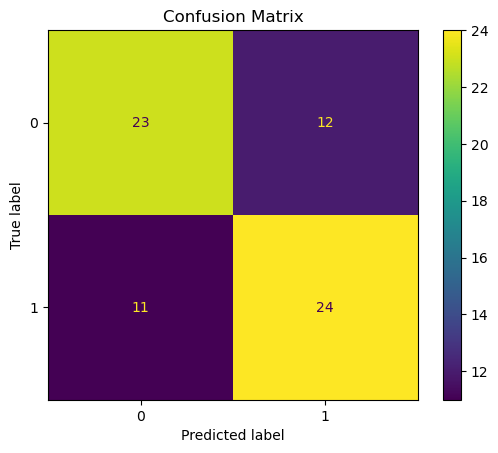

0.6714285714285714


In [8]:
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

MLP_model = MLPClassifier(random_state = 1, max_iter = 1000)

MLP_model.fit(X_train, y_train)
MLP_pred = MLP_model.predict(X_test)

cm = confusion_matrix(y_test, MLP_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm)
cm_display.plot()
plt.title("Confusion Matrix")
plt.show()

print(accuracy_score(y_test, MLP_pred))

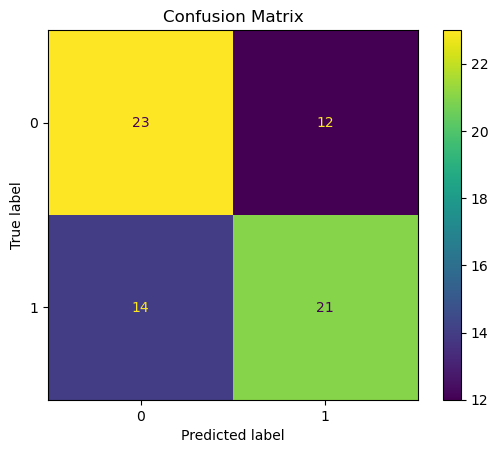

0.6285714285714286


In [9]:
SVM_model = svm.SVC()
SVM_model.fit(X_train,y_train)

SVM_pred = SVM_model.predict(X_test)

cm = confusion_matrix(y_test, SVM_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm)
cm_display.plot()
plt.title("Confusion Matrix")
plt.show()

print(accuracy_score(y_test, SVM_pred))

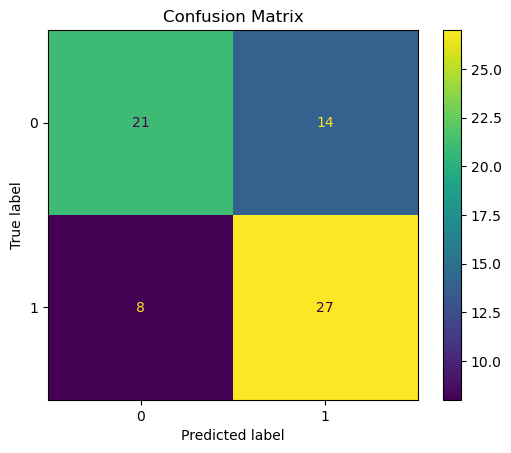

0.6857142857142857


In [10]:
LR_model = LogisticRegression(random_state = 1, max_iter= 1000)
LR_model.fit(X_train, y_train)

LR_pred = LR_model.predict(X_test)

cm = confusion_matrix(y_test, LR_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm)
cm_display.plot()
plt.title("Confusion Matrix")
plt.show()

print(accuracy_score(y_test, LR_pred))

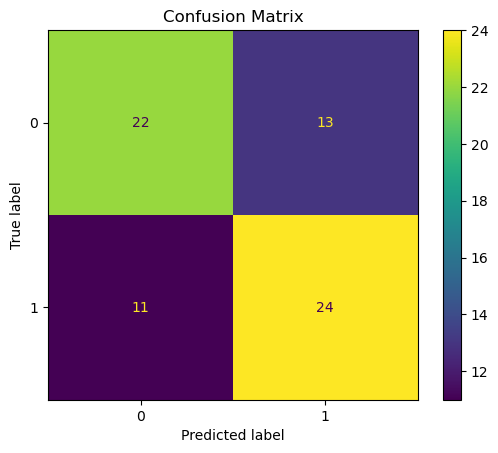

0.6571428571428571


In [11]:
RF_model = RandomForestClassifier(max_depth = 4, random_state = 42)
RF_model.fit(X_train, y_train)

RF_pred = RF_model.predict(X_test)

cm = confusion_matrix(y_test, RF_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm)
cm_display.plot()
plt.title("Confusion Matrix")
plt.show()

print(accuracy_score(y_test, RF_pred))

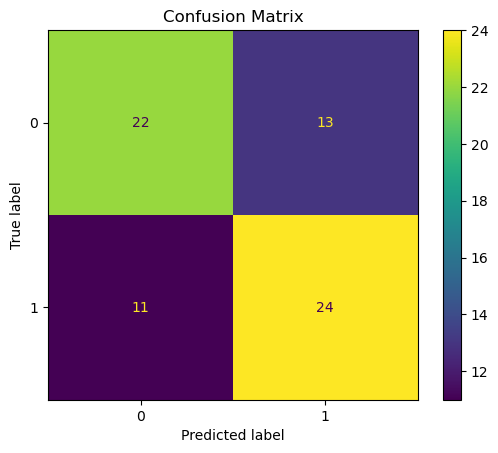

0.6571428571428571


In [12]:
aboost2D = AdaBoostClassifier(n_estimators=40, random_state=42)
aboost2D.fit(X_train, y_train)
ad_pred = RF_model.predict(X_test)

cm = confusion_matrix(y_test, RF_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm)
cm_display.plot()
plt.title("Confusion Matrix")
plt.show()

print(accuracy_score(y_test, ad_pred))

In [13]:
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, LR_pred)}")
print(f"Multi-Layer Perceptron Accuracy: {accuracy_score(y_test, MLP_pred)}")
print(f"ADBoost Accuracy: {accuracy_score(y_test, ad_pred)}")
print(f"Random Forest Accuracy: {accuracy_score(y_test, RF_pred)}")
print(f"Support Vector Machine Accuracy: {accuracy_score(y_test, SVM_pred)}")

Logistic Regression Accuracy: 0.6857142857142857
Multi-Layer Perceptron Accuracy: 0.6714285714285714
ADBoost Accuracy: 0.6571428571428571
Random Forest Accuracy: 0.6571428571428571
Support Vector Machine Accuracy: 0.6285714285714286


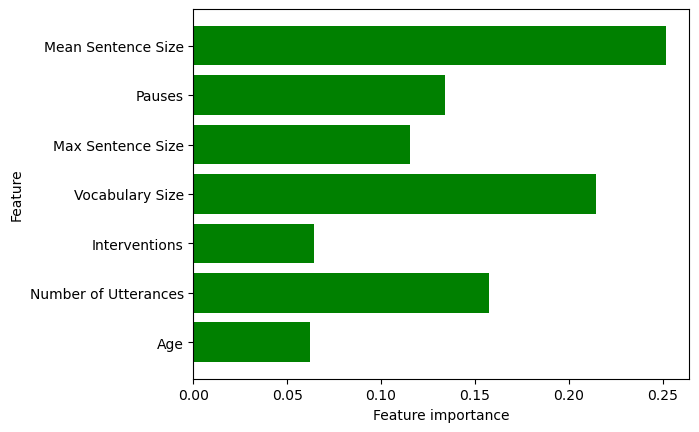

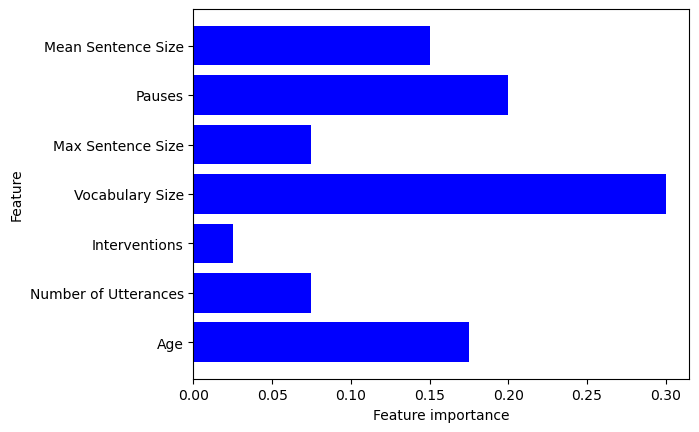

In [14]:
plot_feature_importance(RF_model,"g")
plt.figure()
plot_feature_importance(aboost2D,"b")